In [1]:
#1.Import the necessary libraries.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
df = pd.read_excel(r'C:\Users\Anderson\Desktop\we_fn_use_c_marketing_customer_value_analysis.xlsx')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02 00:00:00,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02 00:00:00,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02 00:00:00,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02 00:00:00,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


In [ ]:
#3.First look at its main features (head, shape, info).

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
#4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [7]:
cols = []

for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
cols

df.columns = cols
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [ ]:
#5.Change effective to date column to datetime format.

In [8]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.340599e+09,No,Basic,Bachelor,2011-10-02,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,1.982348e+08,Four-Door Car,Medsize
9130,PK87824,California,3.096511e+09,Yes,Extended,College,2011-12-02,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,3.792000e+02,Four-Door Car,Medsize
9131,TD14365,California,8.163890e+09,No,Extended,Bachelor,2011-06-02,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,7.907850e+08,Four-Door Car,Medsize
9132,UP19263,California,7.524442e+09,No,Extended,College,2011-03-02,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.912000e+02,Four-Door Car,Large


In [ ]:
#6.Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [9]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.763519e+09,56274,69,32,5,0,1,3.848111e+08
1,6.979536e+09,0,94,13,42,0,8,1.131465e+09
2,1.288743e+09,48767,108,18,38,0,2,5.664722e+08
3,7.645862e+09,0,106,18,65,0,7,5.298813e+08
4,2.813693e+09,43836,73,12,44,0,1,1.381309e+08
...,...,...,...,...,...,...,...,...
9129,2.340599e+09,71941,73,18,89,0,2,1.982348e+08
9130,3.096511e+09,21604,79,14,28,0,1,3.792000e+02
9131,8.163890e+09,0,85,9,37,3,2,7.907850e+08
9132,7.524442e+09,21941,96,34,3,0,3,6.912000e+02


In [ ]:
#7.Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

In [10]:
def create_dfs_by_threshold(df, threshold=150):
    discrete_vars = []
    continuous_vars = []

    for column in df.columns:
        unique_vals = df[column].nunique()
        if unique_vals <= threshold:
            discrete_vars.append(column)
        else:
            continuous_vars.append(column)

    discrete_df = df[discrete_vars].copy()
    continuous_df = df[continuous_vars].copy()

    return discrete_df, continuous_df

In [11]:
create_dfs_by_threshold(numerical_df)

(      months_since_last_claim  months_since_policy_inception  \
 0                          32                              5   
 1                          13                             42   
 2                          18                             38   
 3                          18                             65   
 4                          12                             44   
 ...                       ...                            ...   
 9129                       18                             89   
 9130                       14                             28   
 9131                        9                             37   
 9132                       34                              3   
 9133                        3                             90   
 
       number_of_open_complaints  number_of_policies  
 0                             0                   1  
 1                             0                   8  
 2                             0                   2 

In [ ]:
#8.Plot a correlation matrix, comment what you see.

#no good correlations

In [12]:
correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.034629,0.008741,0.001242,0.003488,0.003933,0.332934,-0.005036
income,0.034629,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.071413
monthly_premium_auto,0.008741,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.242722
months_since_last_claim,0.001242,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.002148
months_since_policy_inception,0.003488,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,-0.004421
number_of_open_complaints,0.003933,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.001330
number_of_policies,0.332934,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.006075
total_claim_amount,-0.005036,-0.071413,0.242722,0.002148,-0.004421,-0.001330,0.006075,1.000000


In [ ]:
#9.Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [13]:
discrete_df, continuous_df = create_dfs_by_threshold(numerical_df)

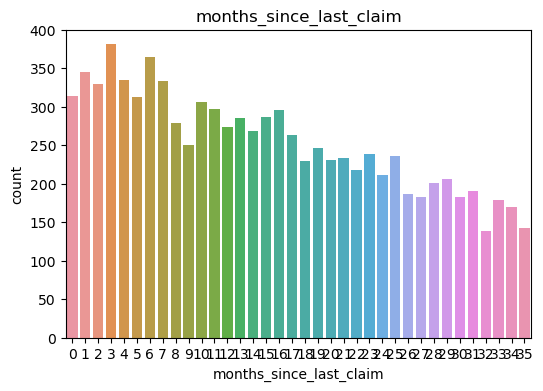

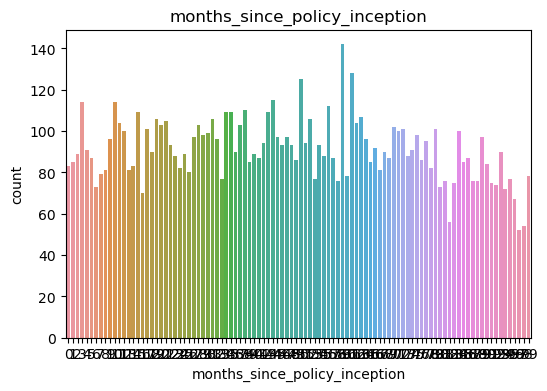

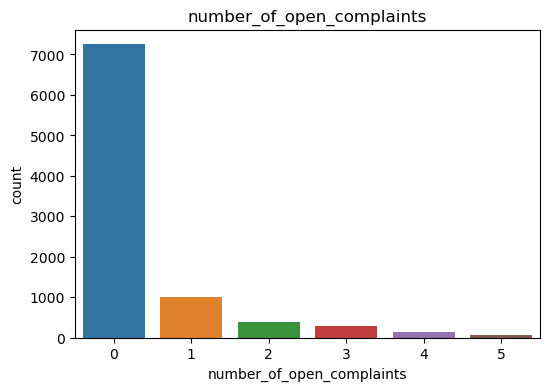

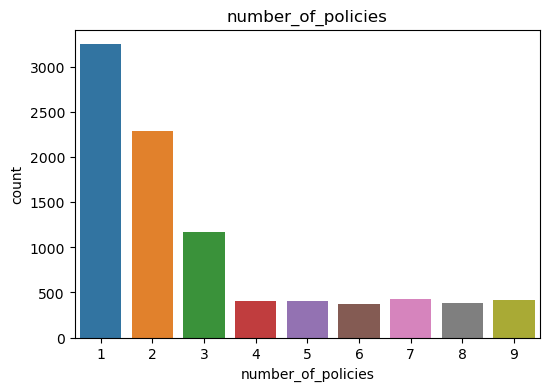

In [14]:
def plot_discrete_variables(df):
    for column in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df)
        plt.title(column)
        plt.show()

plot_discrete_variables(discrete_df)

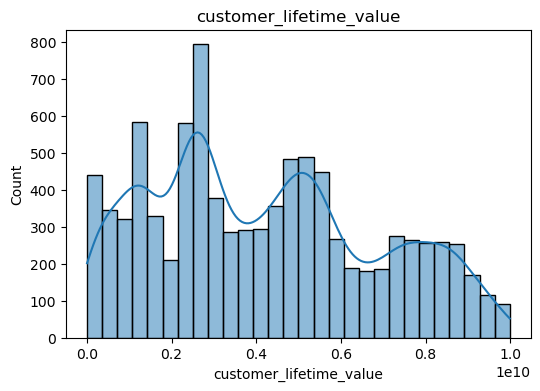

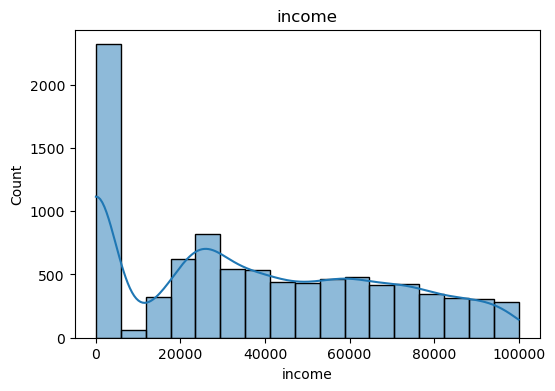

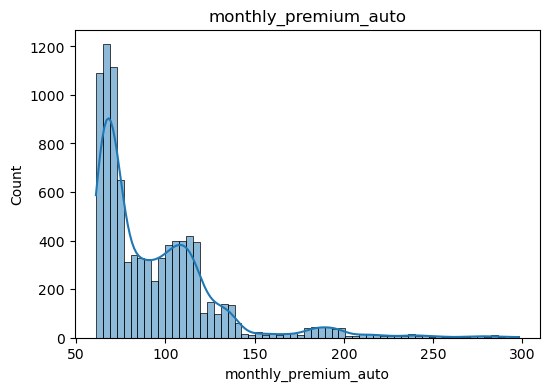

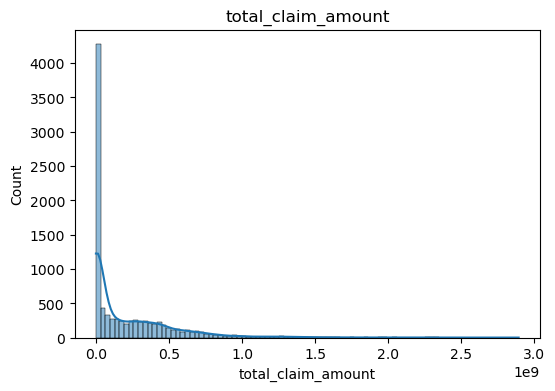

In [15]:
def plot_continuous_variables(df):
    for column in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True)  # Create a histogram for continuous variables
        plt.title(column)
        plt.show()
plot_continuous_variables(continuous_df)

In [ ]:
#10.Comment what you can see in the plots.

#a pattern of values falling

In [ ]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

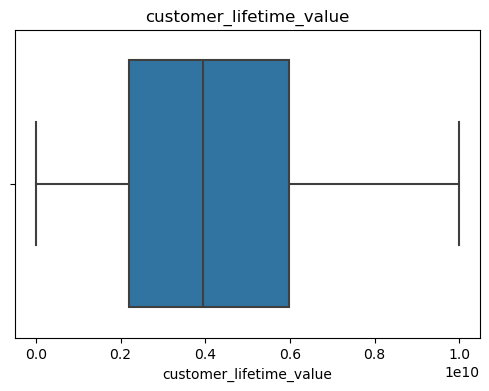

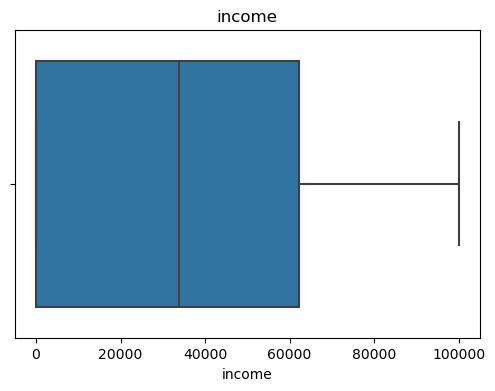

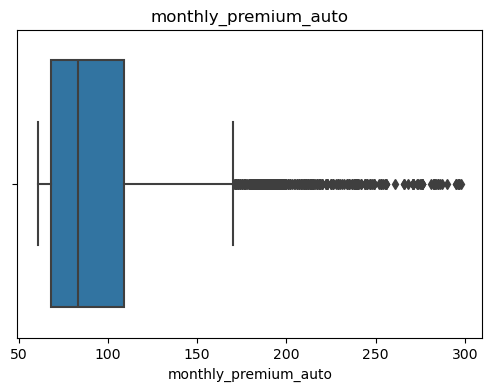

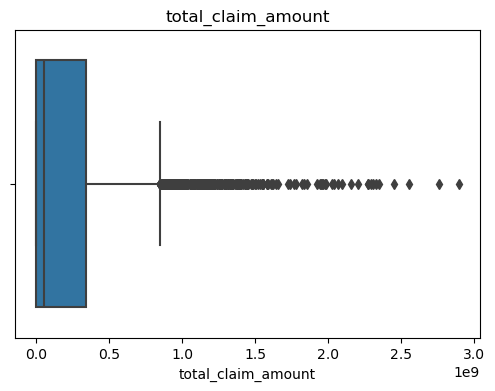

In [16]:
def plot_continuous_variables_with_outliers(df):
    for column in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[column])
        plt.title(column)
        plt.show()
plot_continuous_variables_with_outliers(continuous_df)

In [ ]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
#gonna keep them

In [ ]:
#13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
#there's none

In [17]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64